In [2]:
import csv
import pandas as pd
import numpy as np
#from sklearn import
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

## Years to Load

In [5]:
years = [16,17]

In [9]:
taxi_df = {}
for i in years:
    taxi_df[i] = pd.read_csv("../dataset_4_02_modified/" + str(i) + "taxi_with_weather_std.csv",\
                                    sep = ",")

In [10]:
y_df = {}
X_raw_df = {}
for i in years:
    y_df[i] =  pd.DataFrame(taxi_df[i]['Count'])
    X_raw_df[i] = taxi_df[i].drop(columns = ['Pickup Community Area', \
                                             'Count', 'Trip Start Timestamp'])

In [11]:
weekdays = ['0','1','2','3','4','5','6']
enc = OneHotEncoder(categories=[weekdays])

encoded_df = {}
for i in years:
    enc.fit(X_raw_df[i].weekday.values.reshape(-1, 1))
    encoded_df[i] = pd.DataFrame(enc.transform(X_raw_df[i].weekday.values.reshape(-1, 1))\
                                 .toarray().astype(int))\
                                .rename(columns = {0: 'Monday', 1:'Tuesday', 2:'Wedneseday',\
                                3:'Thursday', 4:'Friday', 5:'Saturday',\
                                6:'Sunday'})

In [12]:
X_encode_df = {}
for i in years:
    X_encode_df[i] = pd.concat([X_raw_df[i].drop(columns=['weekday']), encoded_df[i]], axis=1) 

In [16]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

In [17]:
reg = LinearRegression().fit(X_mat[16], y_mat[16])

In [18]:
reg.score(X_mat[17], y_mat[17])

0.025082754526295162

# Add 2dg terms for lon and lat

In [20]:
for i in years:
    X_encode_df[i]['lat_sq'] = round(X_encode_df[i].lat.pow(2),4)
    X_encode_df[i]['lon_sq'] = round(X_encode_df[i].lon.pow(2),4)
    X_encode_df[i]['latXlon'] = round(X_encode_df[i].lat*X_encode_df[i].lon, 4)

In [21]:
X_mat = {}
y_mat = {}
for i in years:
    X_mat[i] = X_encode_df[i].values
    y_mat[i] = y_df[i].values

In [22]:
reg2 = LinearRegression().fit(X_mat[16], y_mat[16])

## R^2

In [23]:
reg2.score(X_mat[17], y_mat[17])

0.08242689186040497

## Mean Square Error

In [24]:
reg2_pred17 = reg2.predict(X_mat[17])
mean_squared_error(y_true = y_mat[17], y_pred = reg2_pred17)

7283.741146675561

## Analyze error distribution

(array([3.74142e+05, 1.13970e+04, 2.06200e+03, 2.02300e+03, 1.37300e+03,
        5.48000e+02, 1.96000e+02, 2.90000e+01, 4.00000e+00, 2.00000e+00]),
 array([-125.60040964,   56.82116546,  239.24274056,  421.66431566,
         604.08589077,  786.50746587,  968.92904097, 1151.35061607,
        1333.77219117, 1516.19376627, 1698.61534137]),
 <a list of 10 Patch objects>)

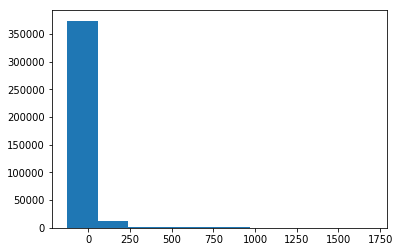

In [25]:
plt.hist(x = (y_mat[17] - reg2_pred17).reshape(1,-1)[0])